In [1]:
pip install netCDF4 xarray matplotlib


Note: you may need to restart the kernel to use updated packages.


# Checking attributes of NetCDF File

In [3]:
from netCDF4 import Dataset

# Path to the NetCDF file
file_path = r"D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_Assignment2\2022-selected\V6GL02.02.CNNPM25.AS.202202-202202.nc"

# Open the NetCDF file
dataset = Dataset(file_path, 'r')

# Print global attributes (CRS might be here)
print("Global Attributes:")
for attr_name in dataset.ncattrs():
    print(f"{attr_name}: {dataset.getncattr(attr_name)}")

# Check variable-specific attributes for CRS information
print("\nVariable Attributes:")
for var_name, var in dataset.variables.items():
    print(f"\nVariable: {var_name}")
    for attr_name in var.ncattrs():
        print(f"  {attr_name}: {var.getncattr(attr_name)}")

# Close the dataset
dataset.close()


Global Attributes:
TITLE: Convolutional Neural Network Monthly PM2.5 Estimation over AS Area.
CONTACT: SIYUAN SHEN <s.siyuan@wustl.edu>
LAT_DELTA: 0.009999999999999998
LON_DELTA: 0.010000000000000002
References: 
SPATIALCOVERAGE: AS
TIMECOVERAGE: 202202

Variable Attributes:

Variable: PM25
  units: ug/m3
  long_name: Convolutional Neural Network derived Monthly PM2.5 [ug/m^3]

Variable: lat
  units: degrees_north
  standard_name: latitude
  long_name: latitude
  axis: X

Variable: lon
  units: degrees_east
  standard_name: longitude
  long_name: longitude
  axis: Y


# Interpolating PM2.5 data to station coordinates

In [6]:
import os
import numpy as np
import pandas as pd
from netCDF4 import Dataset

# File paths
netcdf_folder = r"D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_Assignment2\2022-selected"  # Path to the folder containing 12 NetCDF files
station_file = r"D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_Assignment2\Delhi_AQ_Stations.csv"  # Path to station coordinates CSV file
output_file = "Interpolated_PM25_Stations.csv"  # Output CSV file to save results

# Load station data
stations = pd.read_csv(station_file)

# Prepare a list to store results
results_list = []

# Process each NetCDF file
for month, file in enumerate(sorted(os.listdir(netcdf_folder)), start=1):
    if not file.endswith('.nc'):
        continue
    
    file_path = os.path.join(netcdf_folder, file)
    dataset = Dataset(file_path, 'r')
    
    # Extract latitude, longitude, and PM2.5 data
    lats = dataset.variables['lat'][:]
    lons = dataset.variables['lon'][:]
    pm25_data = dataset.variables['PM25'][:]

    # Loop through each station
    for _, station in stations.iterrows():
        lat = station['Latitude']
        lon = station['Longitude']

        # Find the nearest index for latitude and longitude in the grid
        lat_idx = (np.abs(lats - lat)).argmin()
        lon_idx = (np.abs(lons - lon)).argmin()

        # Extract PM2.5 value at the grid point
        pm25_value = pm25_data[lat_idx, lon_idx]

        # Append result as a dictionary
        results_list.append({
            'Station': station['Station'],
            'Month': month,
            'PM2.5': pm25_value
        })

# Convert results list to a DataFrame
results = pd.DataFrame(results_list)

# Sort the results by Month in ascending order
results = results.sort_values(by='Month', ascending=True)

# Save the sorted results to a CSV file
results.to_csv(output_file, index=False)

print(f"PM2.5 values for station coordinates saved to {output_file} in order from January to December.")


PM2.5 values for station coordinates saved to Interpolated_PM25_Stations.csv in order from January to December.


# Generating Monthly average PM2.5 values

In [12]:
# Load the data from the CSV file
file_path = r"D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_Assignment2\Raw_data_1Day_2022_site_119_Sirifort_Delhi_CPCB_1Day.csv" # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')

# Extract the month from the 'Timestamp' column
data['Month'] = data['Timestamp'].dt.month

# Group by the month and calculate the mean PM2.5 value
monthly_avg = data.groupby('Month')['PM2.5'].mean().reset_index()

# Rename columns for clarity
monthly_avg.columns = ['Month', 'Average PM2.5']

# Save the result to a new CSV file
output_file_path = "Monthly_Average_PM25.csv"
monthly_avg.to_csv(output_file_path, index=False)

print(f"Monthly average PM2.5 values saved to {output_file_path}")


Monthly average PM2.5 values saved to Monthly_Average_PM25.csv


# Creating time-series plots for each station

C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_11132\2100793026.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data["Month"] = station_data["Month"].str.extract(r"(\d+)").astype(int)


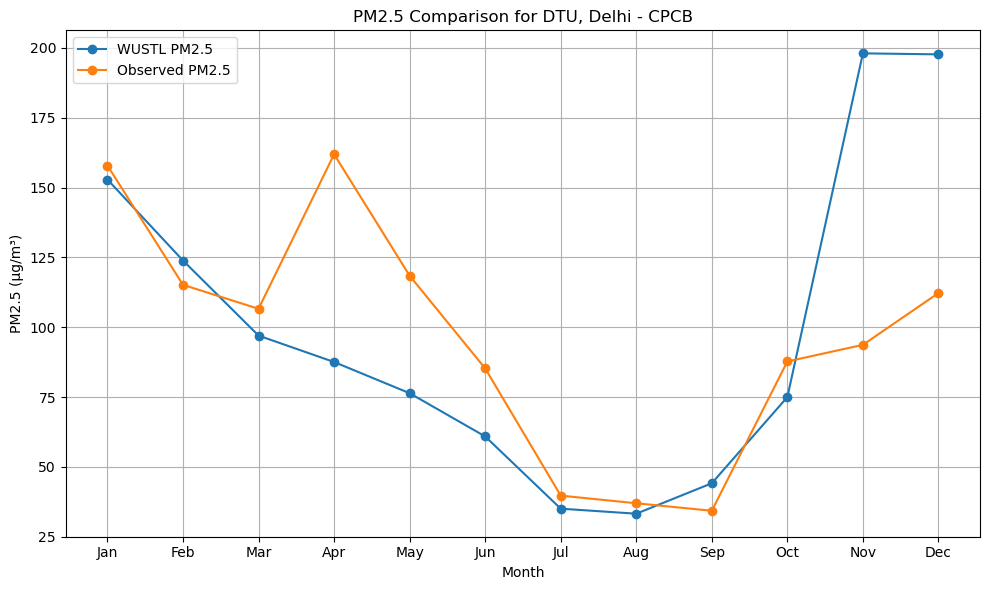

C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_11132\2100793026.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data["Month"] = station_data["Month"].str.extract(r"(\d+)").astype(int)


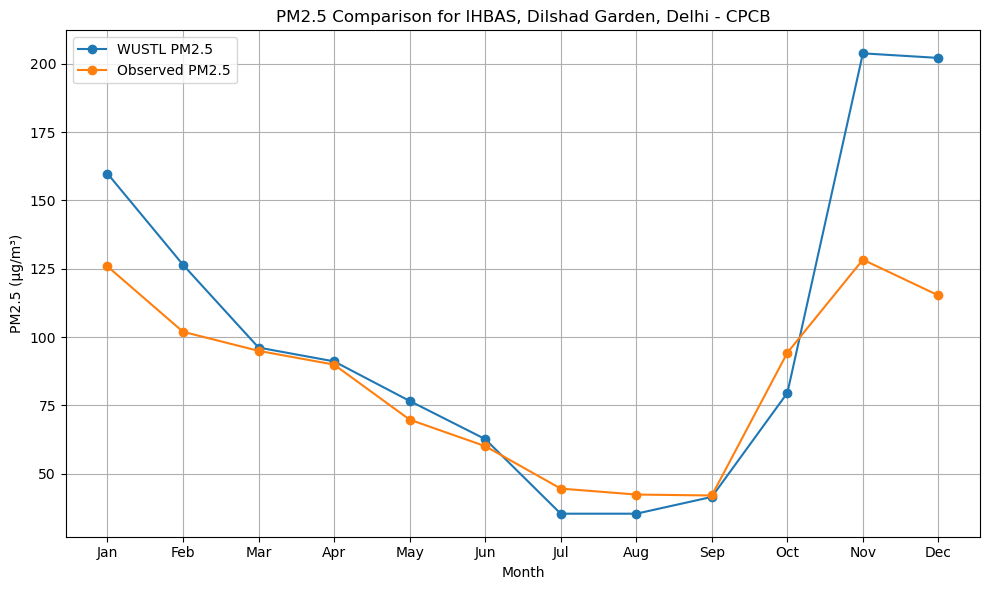

C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_11132\2100793026.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data["Month"] = station_data["Month"].str.extract(r"(\d+)").astype(int)


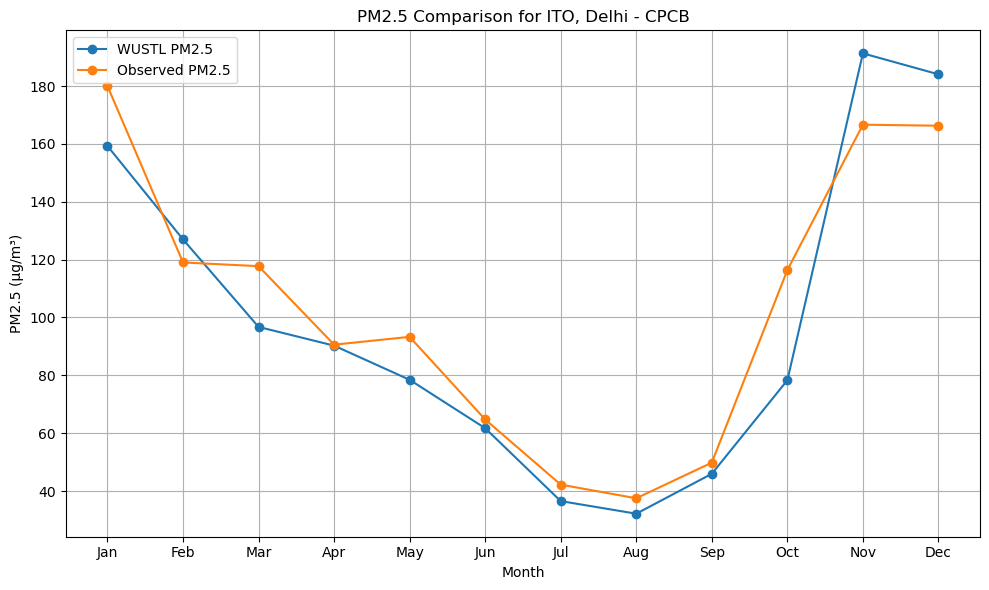

C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_11132\2100793026.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data["Month"] = station_data["Month"].str.extract(r"(\d+)").astype(int)


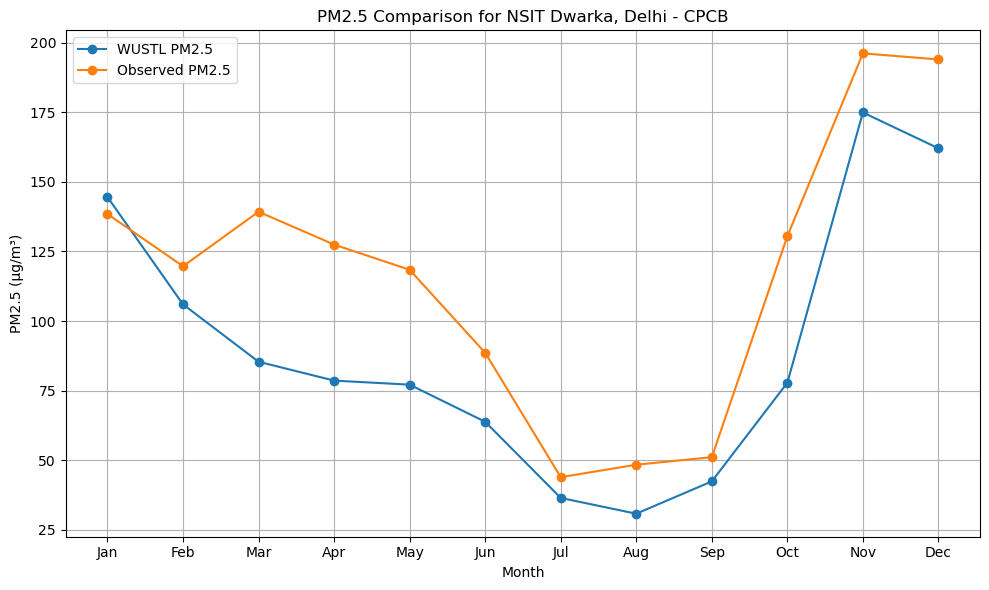

C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_11132\2100793026.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data["Month"] = station_data["Month"].str.extract(r"(\d+)").astype(int)


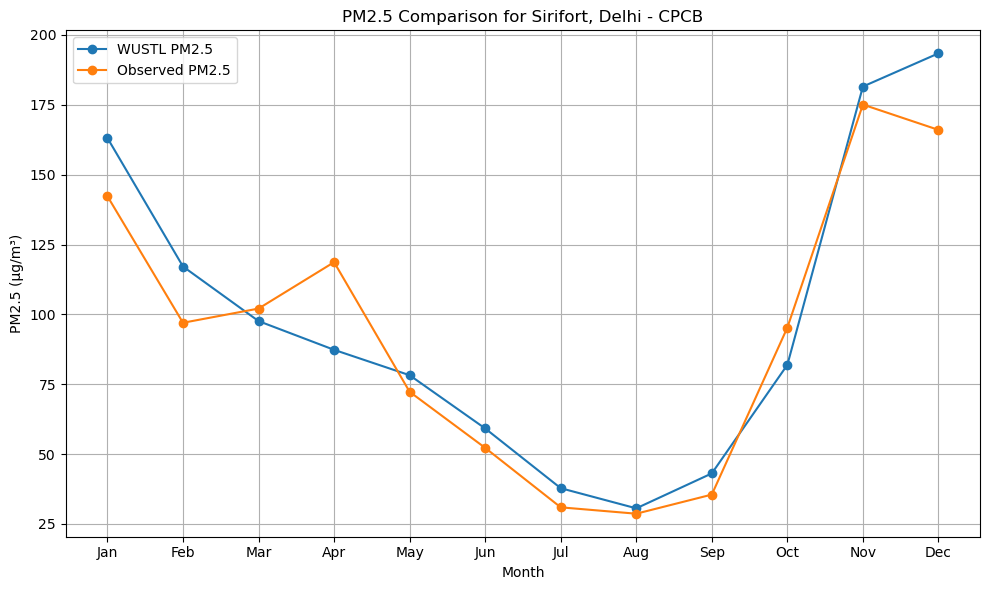

In [13]:
import matplotlib.pyplot as plt

# File paths
wustl_file = "WUSTL_data.csv"  # Replace with your WUSTL data file path
delhi_file = "Delhi_data.csv"  # Replace with your Delhi data file path

# Load the datasets
wustl_data = pd.read_csv(wustl_file)
delhi_data = pd.read_csv(delhi_file)

# Ensure both datasets have the same format
# Melt the data for easier plotting
wustl_melted = wustl_data.melt(id_vars=["Station"], var_name="Month", value_name="WUSTL_PM2.5")
delhi_melted = delhi_data.melt(id_vars=["Station"], var_name="Month", value_name="Observed_PM2.5")

# Merge the datasets on Station and Month
combined_data = pd.merge(wustl_melted, delhi_melted, on=["Station", "Month"])

# Create time-series plots for each station
stations = combined_data["Station"].unique()
for station in stations:
    station_data = combined_data[combined_data["Station"] == station]
    
    # Convert Month column to a numeric type for sorting
    station_data["Month"] = station_data["Month"].str.extract(r"(\d+)").astype(int)
    station_data = station_data.sort_values(by="Month")
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(station_data["Month"], station_data["WUSTL_PM2.5"], marker="o", label="WUSTL PM2.5")
    plt.plot(station_data["Month"], station_data["Observed_PM2.5"], marker="o", label="Observed PM2.5")
    plt.title(f"PM2.5 Comparison for {station}")
    plt.xlabel("Month")
    plt.ylabel("PM2.5 (µg/m³)")
    plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Calculating performance metrics

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the datasets
wustl_file = "WUSTL_data.csv"  # Replace with your WUSTL data file path
delhi_file = "Delhi_data.csv"  # Replace with your Delhi data file path
wustl_data = pd.read_csv(wustl_file)
delhi_data = pd.read_csv(delhi_file)

# Reshape data to long format
wustl_melted = wustl_data.melt(id_vars=["Station"], var_name="Month", value_name="WUSTL_PM2.5")
delhi_melted = delhi_data.melt(id_vars=["Station"], var_name="Month", value_name="Observed_PM2.5")

# Merge the datasets
combined_data = pd.merge(wustl_melted, delhi_melted, on=["Station", "Month"])

# Initialize a list to store metrics for each station
metrics_list = []

# Loop through each station and calculate metrics
stations = combined_data["Station"].unique()
for station in stations:
    station_data = combined_data[combined_data["Station"] == station]
    
    # Extract WUSTL and observed values
    y_true = station_data["Observed_PM2.5"].values
    y_pred = station_data["WUSTL_PM2.5"].values
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    # Append the results
    metrics_list.append({
        "Station": station,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "R²": r2
    })

# Convert metrics list to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Save the results to a CSV file
output_file = "Model_Evaluation_Metrics.csv"
metrics_df.to_csv(output_file, index=False)

# Print the metrics
print(f"Metrics saved to {output_file}")
print(metrics_df)


Metrics saved to Model_Evaluation_Metrics.csv
                               Station       RMSE        MAE   MAPE (%)  \
0                    DTU, Delhi - CPCB  47.065667  32.081500  31.873205   
1  IHBAS, Dilshad Garden, Delhi - CPCB  35.831885  22.006000  21.318813   
2                    ITO, Delhi - CPCB  17.351604  13.606083  12.551794   
3            NSIT Dwarka, Delhi - CPCB  32.317277  27.364667  24.494806   
4               Sirifort, Delhi - CPCB  15.826667  12.771417  14.347215   

         R²  
0 -0.324036  
1 -0.388883  
2  0.866991  
3  0.562968  
4  0.895098  


# PM2.5 Values on the 1st Day of Each Month for All Stations

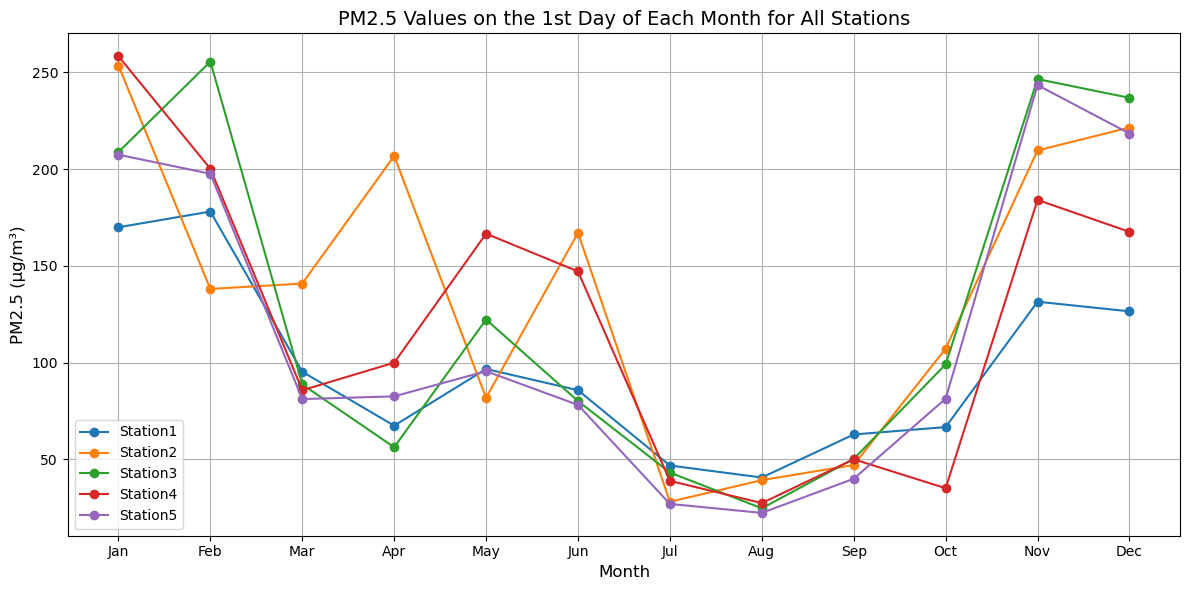

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the CSV files of 5 stations
station_files = {
    "Station1": "Raw_data_1Day_2022_site_114_IHBAS_Dilshad_Garden_Delhi_CPCB_1Day.csv",  # Replace with actual file paths
    "Station2": "Raw_data_1Day_2022_site_115_NSIT_Dwarka_Delhi_CPCB_1Day.csv",
    "Station3": "Raw_data_1Day_2022_site_117_ITO_Delhi_CPCB_1Day.csv",
    "Station4": "Raw_data_1Day_2022_site_118_DTU_Delhi_CPCB_1Day.csv",
    "Station5": "Raw_data_1Day_2022_site_119_Sirifort_Delhi_CPCB_1Day.csv"
}

# Dictionary to store extracted data
station_data = {}

# Loop through each station file
for station, file in station_files.items():
    # Load the data
    data = pd.read_csv(file)
    
    # Convert Timestamp to datetime
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')
    
    # Extract rows corresponding to the 1st day of each month
    data['Day'] = data['Timestamp'].dt.day
    data['Month'] = data['Timestamp'].dt.month
    first_day_data = data[data['Day'] == 1].groupby('Month').first()
    
    # Store the PM2.5 values for the first day of each month
    station_data[station] = first_day_data['PM2.5'].values

# Combine data into a DataFrame for plotting
plot_data = pd.DataFrame(station_data)
plot_data.index = range(1, 13)  # Months

# Plot the data
plt.figure(figsize=(12, 6))
for station in station_files.keys():
    plt.plot(plot_data.index, plot_data[station], marker='o', label=station)

# Customize the plot
plt.title("PM2.5 Values on the 1st Day of Each Month for All Stations", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("PM2.5 (µg/m³)", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Weekly Average PM2.5 Values (1st Week of Each Month)

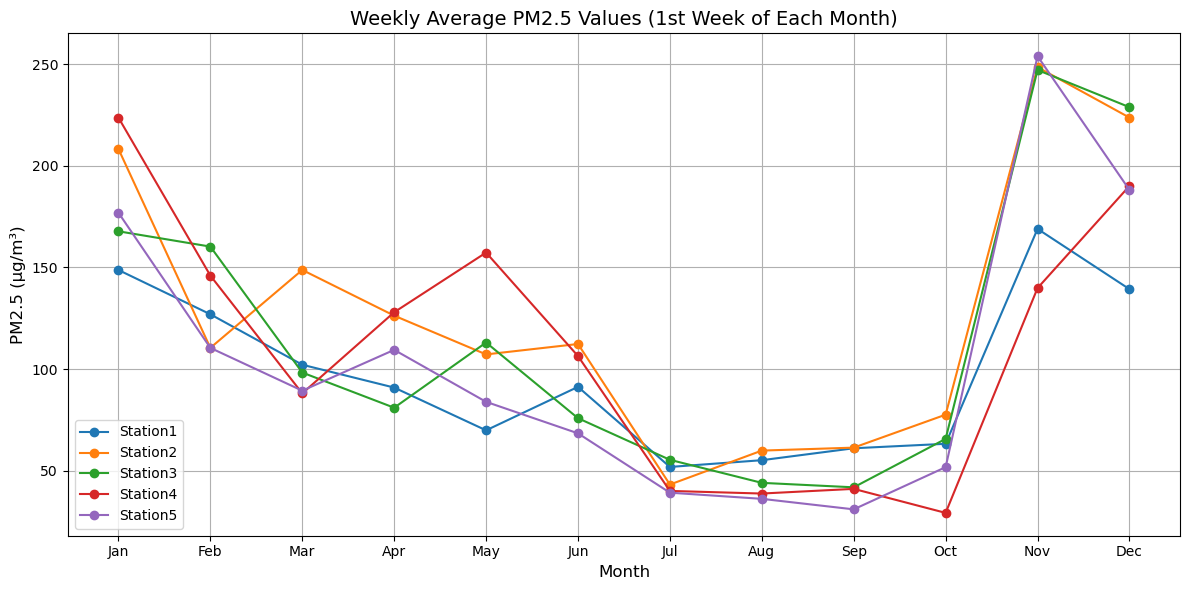

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the CSV files of 5 stations
station_files = {
    "Station1": "Raw_data_1Day_2022_site_114_IHBAS_Dilshad_Garden_Delhi_CPCB_1Day.csv",  # Replace with actual file paths
    "Station2": "Raw_data_1Day_2022_site_115_NSIT_Dwarka_Delhi_CPCB_1Day.csv",
    "Station3": "Raw_data_1Day_2022_site_117_ITO_Delhi_CPCB_1Day.csv",
    "Station4": "Raw_data_1Day_2022_site_118_DTU_Delhi_CPCB_1Day.csv",
    "Station5": "Raw_data_1Day_2022_site_119_Sirifort_Delhi_CPCB_1Day.csv"
}

# Dictionary to store weekly averages
station_data = {}

# Loop through each station file
for station, file in station_files.items():
    # Load the data
    data = pd.read_csv(file)
    
    # Convert Timestamp to datetime
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')
    
    # Extract rows corresponding to the 1st week of each month
    data['Day'] = data['Timestamp'].dt.day
    data['Month'] = data['Timestamp'].dt.month
    first_week_data = data[data['Day'] <= 7].groupby('Month')['PM2.5'].mean()
    
    # Store the weekly average for each month
    station_data[station] = first_week_data.values

# Combine data into a DataFrame for plotting
plot_data = pd.DataFrame(station_data)
plot_data.index = range(1, 13)  # Months

# Plot the data
plt.figure(figsize=(12, 6))
for station in station_files.keys():
    plt.plot(plot_data.index, plot_data[station], marker='o', label=station)

# Customize the plot
plt.title("Weekly Average PM2.5 Values (1st Week of Each Month)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("PM2.5 (µg/m³)", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Monthly Average PM2.5 Values for All Stations

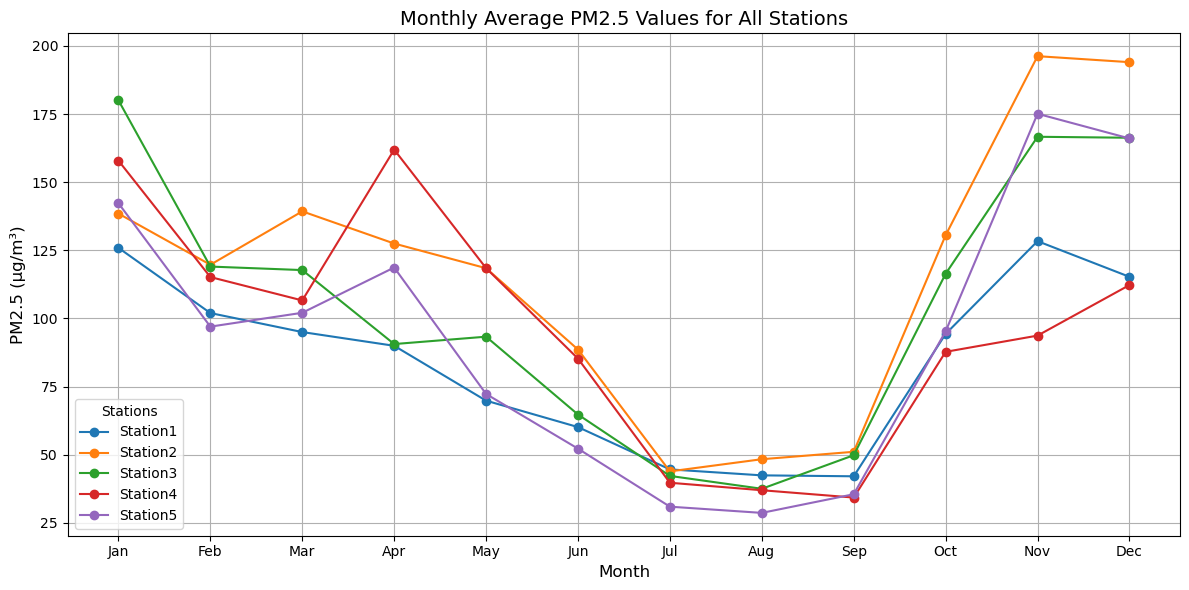

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the CSV files of 5 stations
station_files = {
    "Station1": "Raw_data_1Day_2022_site_114_IHBAS_Dilshad_Garden_Delhi_CPCB_1Day.csv",  # Replace with actual file paths
    "Station2": "Raw_data_1Day_2022_site_115_NSIT_Dwarka_Delhi_CPCB_1Day.csv",
    "Station3": "Raw_data_1Day_2022_site_117_ITO_Delhi_CPCB_1Day.csv",
    "Station4": "Raw_data_1Day_2022_site_118_DTU_Delhi_CPCB_1Day.csv",
    "Station5": "Raw_data_1Day_2022_site_119_Sirifort_Delhi_CPCB_1Day.csv"
}

# Dictionary to store monthly averages
station_data = {}

# Loop through each station file
for station, file in station_files.items():
    # Load the data
    data = pd.read_csv(file)
    
    # Convert Timestamp to datetime
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')
    
    # Extract the month and calculate the monthly average
    data['Month'] = data['Timestamp'].dt.month
    monthly_avg = data.groupby('Month')['PM2.5'].mean()
    
    # Store the monthly average
    station_data[station] = monthly_avg.values

# Combine data into a DataFrame for plotting
plot_data = pd.DataFrame(station_data)
plot_data.index = range(1, 13)  # Months

# Plot the data
plt.figure(figsize=(12, 6))
for station in station_files.keys():
    plt.plot(plot_data.index, plot_data[station], marker='o', label=station)

# Customize the plot
plt.title("Monthly Average PM2.5 Values for All Stations", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("PM2.5 (µg/m³)", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Stations")
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights
+ Station 4 (NSIT Dwarka, Delhi - CPCB) consistently records higher PM2.5 values in daily, weekly and monthly plots. Deviates significantly from other stations, indicating higher localized pollution sources.
+ **Station 5 (Siri fort, Delhi - CPCB)** consistently records lower PM2.5 levels compared to other stations.
+ Station 3 (ITO) reflects moderate pollution levels with reliable data.
+ Station 1 (DTU) and Station 2 (IHBAS) may have data inconsistencies or localized pollution spikes that satellite data struggles to capture.
